# FCT Unesp - TCC Treino 3
Aluno: Pétrus Antonio Bárbosa Pradella

TCC2 - Treinando análise preditiva para dados de transações comerciais.

Teste 3
    - DataSet Utilizado: Weekly Sales Transactions
    - Fonte: Tableau Community
    - Link: https://community.tableau.com/docs/DOC-1236
    
    Dataset disponibilizado na "December Tableau User Group presentation" de 2017
    
Caracteristicas gerais do Dataset:

    - Número de Instancias: 9994
    - Número de Atributos: 20

### Importando as bibliotecas necessárias

In [1]:
from myownapi.MainAPI import MainAPI;

In [2]:
MainAPI.getVersion()

'0.2.1d'

### Carregando a base de dados

In [3]:
onlineMode = False;

if onlineMode:
    dataset_folder_url = "http://downloads.finalcraft.com.br/tcc/SuperStoreData";
else:
    dataset_folder_url = "C:/Users/Petrus/Desktop/UNESP/Docs 2016-2020/2019/Segundo Semestre/TCC2/TCC BigData Analytics/Treino3";

dataset_file = dataset_folder_url + '/SuperStore.xls';

df = MainAPI.read_xls(dataset_file);
df.head(3)

Iniciando leitura do arquivo:
 --> C:/Users/Petrus/Desktop/UNESP/Docs 2016-2020/2019/Segundo Semestre/TCC2/TCC BigData Analytics/Treino3/SuperStore.xls
Arquivo lido com sucesso!


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


### Descrevendo o DataFrame

In [4]:
#MainAPI.descreverDataFrame()
MainAPI.descreverAtributo('Category')

count                9994
unique                  3
top       Office Supplies
freq                 6026
Name: Category, dtype: object

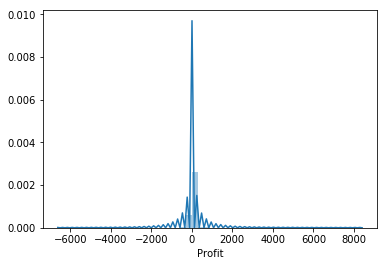

In [5]:
MainAPI.plotar('Profit')

### Selecionando dados 

In [6]:
#Filtrando todo o data-set para pegar apenas aqueles que são da categoria Furniture

#Pegar todos os elemtnos cuja categoria 'category' é igual a 'Furniture';

furniture = MainAPI.df.loc[MainAPI.df['Category'] == 'Furniture']

#furniture = MainAPI.pegarDataframeCondicionalmente('Category', 'Furniture');

In [7]:
#Reduzindo dataset para apenas dois valores, para que seja possivel aplicar ARIMA

furniture = furniture[['Order Date', 'Sales']]

#furniture.groupby('Order Date')['Sales'].sum().reset_index()
#MainAPI.setDataframe(furniture)
#furniture.isnull().sum()  // Dataset sem elementos nulos

orederedFurniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
orederedFurniture = orederedFurniture.set_index('Order Date')

print(orederedFurniture)

                Sales
Order Date           
2014-01-06  2573.8200
2014-01-07    76.7280
2014-01-10    51.9400
2014-01-11     9.9400
2014-01-13   879.9390
2014-01-14    61.9600
2014-01-16   127.1040
2014-01-19   181.4700
2014-01-20  1413.5100
2014-01-21    25.2480
2014-01-26   217.2000
2014-01-27   333.0000
2014-01-31   290.6660
2014-02-08    14.5600
2014-02-11  1650.0500
2014-02-12   129.5680
2014-02-18    25.1600
2014-02-20    20.3200
2014-03-01  1893.9950
2014-03-03   928.8020
2014-03-07   966.9840
2014-03-11     8.3200
2014-03-14  1139.9200
2014-03-15    45.6960
2014-03-17  3265.2300
2014-03-18  1462.4500
2014-03-19    25.0080
2014-03-21   251.3280
2014-03-22   314.3520
2014-03-24    40.4800
...               ...
2017-11-26  1375.6000
2017-11-27    65.7800
2017-11-28  4659.1400
2017-11-29   491.8880
2017-11-30  4129.7280
2017-12-01  2542.2920
2017-12-02  3527.5040
2017-12-03   591.8400
2017-12-04   992.7820
2017-12-05   321.4800
2017-12-07    82.3800
2017-12-08  3368.2650
2017-12-09

In [8]:
# Esse comando resample só pode ser usado em dataframes com index em TimeStamp (Ou seja, só serve para problemas de séries temporáis, como esse)

# Nesse caso, dando ressample com a média dos meses, mas poderia ser a soma do total vendido tambem...
monthilyOrderedFurniture = orederedFurniture['Sales'].resample('MS').mean();
monthilyOrderedFurniture.head(5)

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049187
Freq: MS, Name: Sales, dtype: float64

### Visualização dos Dados

In [1]:
#Caso usando algum programa diferente do notebook, ativar isso daqui:
#import matplotlib.pyplot as plt;

monthilyOrderedFurniture.plot(figsize = (15,6))
#plt.show()

NameError: name 'monthilyOrderedFurniture' is not defined

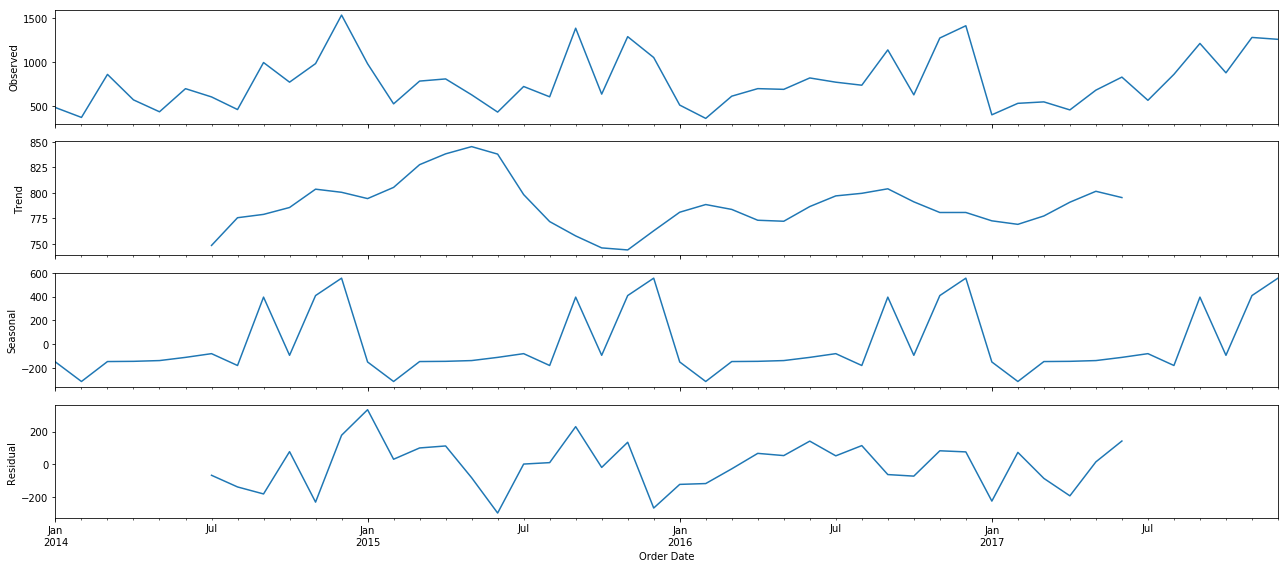

In [10]:
from pylab import rcParams;
import statsmodels.api as sm;

rcParams['figure.figsize'] = 18,8;

#Dois tipos de modelos possíves, Aditivo e Multiplicativo (Necessário testar as diferenças)
decomposicao = sm.tsa.seasonal_decompose(monthilyOrderedFurniture, model='addtive')
decomposicao.plot();


### Arima Predction


#### Preparando quantidade de treino.

In [11]:
import itertools;

p = sazonalidade = range(0, 2);     # Arima P == auto-regressive part of the model
d = tendencia = range(0, 2);        # Arima D == integrated part of the model
q = ruido = range(0,2);             # Arima Q == moving average part of the model

#itertools.product basicamente relaciona todas as variáveis com todas as varíaveis... como já diz, PRODUCT
pdq = list(itertools.product(sazonalidade, tendencia, ruido))

#Criando agora as variações de calculos para o arima usar.
#(Similar ao 'grid search' de machine learning)
ARIMA_SASONALIDADE = 12; #12 meses, no caso, 1 ano;
seasonal_pdq = [(x[0], x[1], x[2], ARIMA_SASONALIDADE) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

#### Escolhendo melhor combinação de parametros arima

In [12]:
import warnings;
import sys;
warnings.filterwarnings("ignore") # Negócio chato pacas...

menorCombinacao = None;
menorCombinacaoValor = 99999999999999999;#Mesma coisa que Integer.MAX_VALUE

for parametro in pdq:
    for parametro_sasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthilyOrderedFurniture,
                                            order=parametro,
                                            seasonal_order=parametro_sasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            resultado = mod.fit()
            
            if resultado.aic < menorCombinacaoValor:
                menorCombinacao = [parametro, parametro_sasonal, ARIMA_SASONALIDADE];
                menorCombinacaoValor = resultado.aic;
            
            print('ARIMA{}x{}x{} - AIC:{}'.format(parametro, parametro_sasonal, ARIMA_SASONALIDADE, resultado.aic))
        except:
            #Algumas combinações são NaN (Não são possíveis! por isso tem esse TryCath)
            continue
          
print('\n\n')
print('O menor valor encontrado par ao AIC é: {}'.format(menorCombinacaoValor))
print('Utilizando a combinação: ARIMA{}x{}x{}'.format(menorCombinacao[0], menorCombinacao[1], menorCombinacao[2]))

theOrder = menorCombinacao[0];
theSeasonal_order = menorCombinacao[1];

ARIMA(0, 0, 0)x(0, 0, 0, 12)x12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)x12 - AIC:1539.0810235652464
ARIMA(0, 0, 0)x(0, 1, 0, 12)x12 - AIC:477.71701309202183
ARIMA(0, 0, 0)x(1, 0, 0, 12)x12 - AIC:497.2314433418337
ARIMA(0, 0, 0)x(1, 0, 1, 12)x12 - AIC:1322.6700462015492
ARIMA(0, 0, 0)x(1, 1, 0, 12)x12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)x12 - AIC:720.9252270758103
ARIMA(0, 0, 1)x(0, 0, 1, 12)x12 - AIC:2804.4184884792076
ARIMA(0, 0, 1)x(0, 1, 0, 12)x12 - AIC:466.56074298091573
ARIMA(0, 0, 1)x(1, 0, 0, 12)x12 - AIC:499.59519412881275
ARIMA(0, 0, 1)x(1, 0, 1, 12)x12 - AIC:2628.696024785891
ARIMA(0, 0, 1)x(1, 1, 0, 12)x12 - AIC:319.98848769468674
ARIMA(0, 1, 0)x(0, 0, 0, 12)x12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)x12 - AIC:1397.459790988555
ARIMA(0, 1, 0)x(0, 1, 0, 12)x12 - AIC:486.63785671879367
ARIMA(0, 1, 0)x(1, 0, 0, 12)x12 - AIC:497.78896630044073
ARIMA(0, 1, 0)x(1, 0, 1, 12)x12 - AIC:1503.4381543212028
ARIMA(0, 1, 0)x(1, 1, 0, 12)x12 - AIC:3

#### Ajuste de Modelo

In [13]:
mod = sm.tsa.statespace.SARIMAX(monthilyOrderedFurniture,
                                order=theOrder,
                                seasonal_order=theSeasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultado_final = mod.fit()

print(resultado_final.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


#### Observação de Diagnóstico

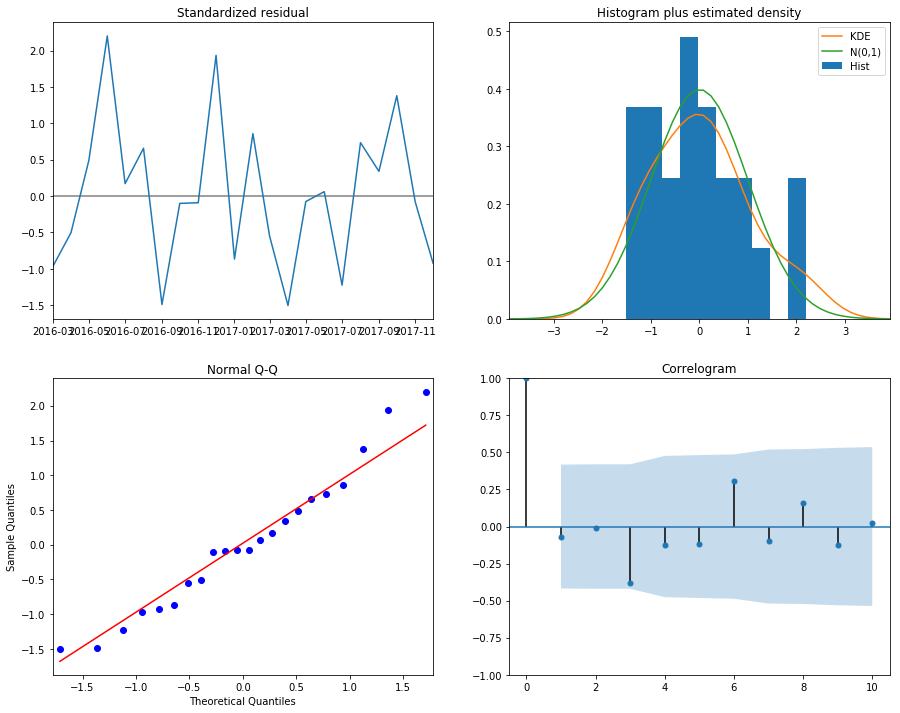

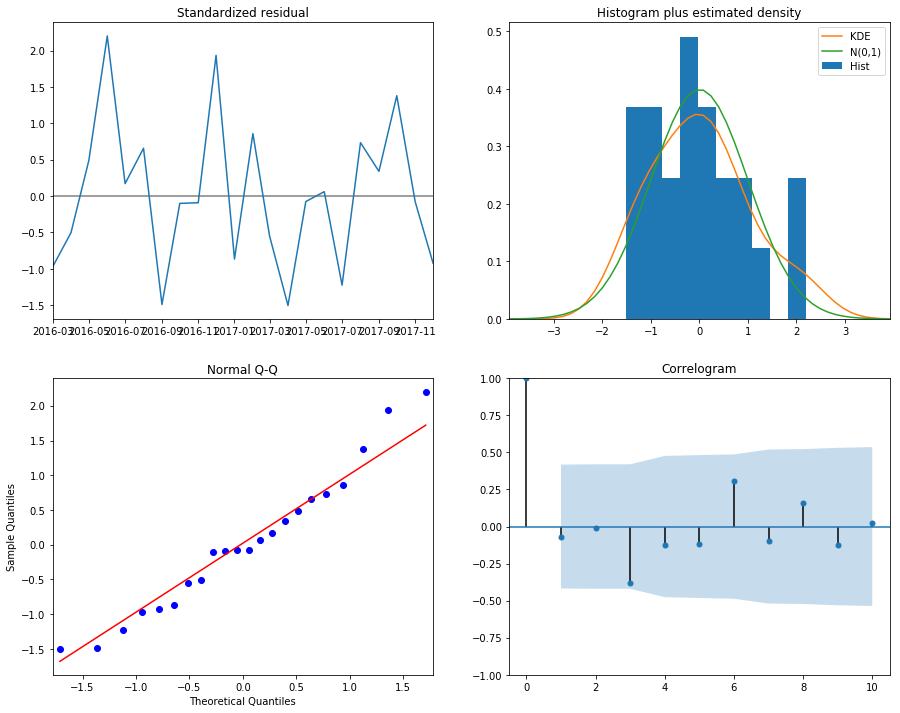

In [14]:
#import matplotlib.pyplot as plt
resultado_final.plot_diagnostics(figsize=(15, 12))
#plt.show()


### Forecast dos dados em modo de treino

In [15]:
import pandas as pd;

#Predição propriamente dita
pred = resultado_final.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

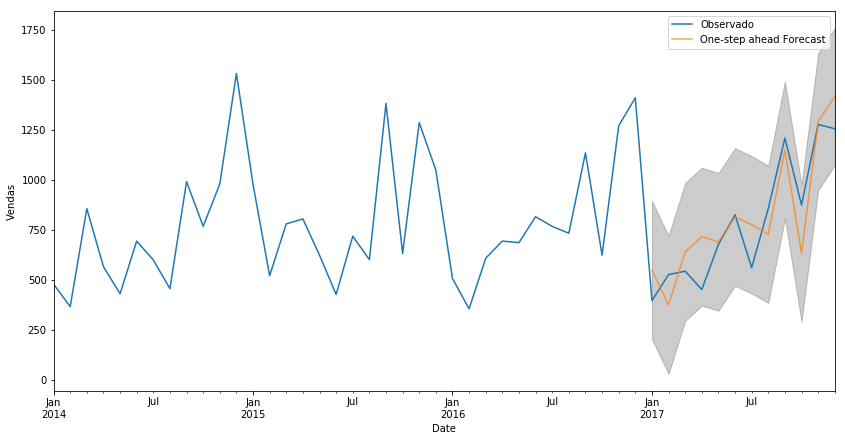

In [16]:
import matplotlib.pyplot as plt

ax = monthilyOrderedFurniture['2014':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14,7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Vendas')
plt.legend()
plt.show()


### Real Forecast

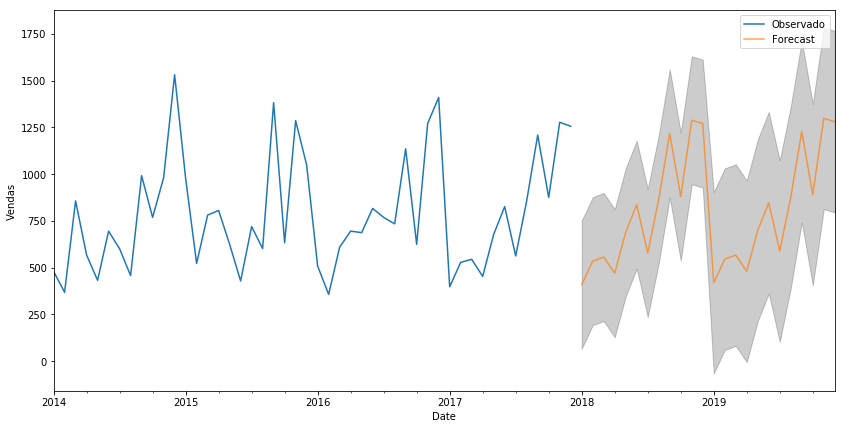

In [17]:
pred_uc = resultado_final.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()

ax = monthilyOrderedFurniture['2014':].plot(label='Observado')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14,7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Vendas')
plt.legend()
plt.show()